In [25]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt

### 빅카인즈에서 제공하는 키워드를 포함하는 뉴스기사수 dataframe으로 만들기
키워드: 침체, 금융위기, 불황, 폭락, 외환위기

In [11]:
news_df = pd.read_json('./data/bigkinds.json')
news_df

,date,침체,금융위기,불황,폭락,외환위기
0,20150907,737,399,273,236,135
1,20150914,701,513,274,147,226
2,20150921,575,267,231,216,111
3,20150928,480,248,173,129,79
4,20151005,576,262,204,87,109
...,...,...,...,...,...,...
264,20200928,489,90,114,95,78
265,20201005,816,183,177,109,78
266,20201012,857,199,176,112,91
267,20201019,911,155,143,95,129


In [12]:
def getDate(df_row):
    date = str(df_row)

    year = date[0:4]
    month = date[4:6]
    day = date[6:9]
    return int(year), int(month), int(day)

### DB연동

In [20]:
conn = pymysql.connect(host = "127.0.0.1", user = [USER], passwd = [PASSWORD], db = [DATABASE], cursorclass = pymysql.cursors.DictCursor)
cur = conn.cursor()

cur.execute("show databases")
print(cur.fetchall())
cur.execute("use [DATABASE]")

[{'Database': 'information_schema'}, {'Database': 'CLI'}, {'Database': 'MusicBank'}, {'Database': 'mysql'}, {'Database': 'mytestdb'}, {'Database': 'performance_schema'}, {'Database': 'sys'}]


0

### DB table 생성

keyword1: 침체, keyword2:금융위기, keyword3: 불황, keyword4: 저성장, keyword5: 외환위기

In [14]:
"""
news counting 정보 저장할 table 생성
"""

create_table_query = """
CREATE TABLE IF NOT EXISTS news_counting(
    id BIGINT(7) NOT NULL AUTO_INCREMENT,
    year bigint(4) NOT NULL,
    month bigint(2) NOT NULL,
    day bigint(2) NOT NULL, 
    keyword1 bigint(100),
    keyword2 bigint(100),
    keyword3 bigint(100),
    keyword4 bigint(100),
    keyword5 bigint(100),
    primary key(id) )
    charset=utf8mb4;
"""
cur.execute(create_table_query)
# charset=utf8mb4; 유니코드 스트링 저장

0

In [15]:
cur.execute("desc news_counting")
table = cur.fetchall()
pd.DataFrame(list(table))

,Field,Type,Null,Key,Default,Extra
0,id,bigint(7),NO,PRI,None,auto_increment
1,year,bigint(4),NO,,None,
2,month,bigint(2),NO,,None,
3,day,bigint(2),NO,,None,
4,keyword1,bigint(100),YES,,None,
5,keyword2,bigint(100),YES,,None,
6,keyword3,bigint(100),YES,,None,
7,keyword4,bigint(100),YES,,None,
8,keyword5,bigint(100),YES,,None,


### news counting정보 주별로 저장

In [17]:
"""
db table에 저장
"""
for i in range(len(news_df)):
    query = """ 
    Insert into news_counting (year, month, day, keyword1, keyword2, keyword3, keyword4, keyword5 ) values (%d, %d, %d, %d, %d, %d, %d, %d) ;
    """
    year, month, day = getDate(news_df.iloc[i]['date'])
    keyword1_cnt = news_df.iloc[i]['침체']
    keyword2_cnt = news_df.iloc[i]['금융위기']
    keyword3_cnt = news_df.iloc[i]['불황']
    keyword4_cnt = news_df.iloc[i]['폭락']
    keyword5_cnt = news_df.iloc[i]['외환위기']

    mystring = ( query % (year, month, day, keyword1_cnt, keyword2_cnt, keyword3_cnt, keyword4_cnt, keyword5_cnt) )
    print(mystring)
    cur.execute(mystring)

es (2018, 5, 7, 409, 160, 113, 155, 105) ;
    
 
    Insert into news_counting (year, month, day, keyword1, keyword2, keyword3, keyword4, keyword5 ) values (2018, 5, 14, 473, 293, 162, 109, 146) ;
    
 
    Insert into news_counting (year, month, day, keyword1, keyword2, keyword3, keyword4, keyword5 ) values (2018, 5, 21, 503, 212, 152, 85, 92) ;
    
 
    Insert into news_counting (year, month, day, keyword1, keyword2, keyword3, keyword4, keyword5 ) values (2018, 5, 28, 633, 237, 216, 147, 89) ;
    
 
    Insert into news_counting (year, month, day, keyword1, keyword2, keyword3, keyword4, keyword5 ) values (2018, 6, 4, 444, 199, 142, 74, 80) ;
    
 
    Insert into news_counting (year, month, day, keyword1, keyword2, keyword3, keyword4, keyword5 ) values (2018, 6, 11, 435, 235, 133, 95, 75) ;
    
 
    Insert into news_counting (year, month, day, keyword1, keyword2, keyword3, keyword4, keyword5 ) values (2018, 6, 18, 456, 229, 137, 143, 96) ;
    
 
    Insert into news_counting

In [21]:
# 확인
query = """ 
select * from news_counting ;
"""
cur.execute(query)
news_df = pd.DataFrame(list(cur.fetchall()))
news_df

,id,year,month,day,keyword1,keyword2,keyword3,keyword4,keyword5
0,1,2015,9,7,737,399,273,236,135
1,2,2015,9,14,701,513,274,147,226
2,3,2015,9,21,575,267,231,216,111
3,4,2015,9,28,480,248,173,129,79
4,5,2015,10,5,576,262,204,87,109
...,...,...,...,...,...,...,...,...,...
264,265,2020,9,28,489,90,114,95,78
265,266,2020,10,5,816,183,177,109,78
266,267,2020,10,12,857,199,176,112,91
267,268,2020,10,19,911,155,143,95,129


In [22]:
conn.commit()
cur.close()
conn.close()

## 뉴스 기사수 카운팅 시각화 
keyword1: 침체, keyword2:금융위기, keyword3: 불황, keyword4: 저성장, keyword5: 외환위기

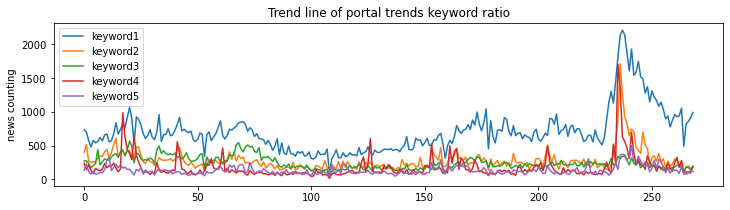

In [27]:
plt.figure(figsize = (12,3))
plt.plot(news_df['keyword1'], label = 'keyword1')
plt.plot(news_df['keyword2'], label = 'keyword2')
plt.plot(news_df['keyword3'], label = 'keyword3')
plt.plot(news_df['keyword4'], label = 'keyword4')
plt.plot(news_df['keyword5'], label = 'keyword5')
plt.title("Trend line of portal trends keyword ratio")
plt.ylabel("news counting")
plt.legend(loc='upper left')

plt.show()